In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Load the dataset
df = pd.read_csv('covid19_patients.csv')

# Standarize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display initial information
print(f"Dataset size: {len(df)} rows")
df.head()

Dataset size: 5000 rows


,patient_id,age,gender,fever,dry_cough,sore_throat,fatigue,headache,shortness_of_breath,loss_of_smell,loss_of_taste,oxygen_level,body_temperature,comorbidity,travel_history,contact_with_patient,chest_pain,covid_result
0,1,52,Male,1,0,1,1,0,0,0,0,98,37.1,Diabetes,0,0,0,0
1,2,15,Male,0,0,0,1,1,0,0,0,85,37.7,Diabetes,0,1,0,0
2,3,72,Male,1,0,1,0,0,1,0,1,99,36.8,NaN,0,0,0,0
3,4,61,Female,0,0,1,1,1,0,1,1,86,36.0,NaN,1,0,0,0
4,5,21,Female,1,1,0,0,0,1,0,1,90,36.4,NaN,1,1,1,1


In [ ]:
# Check data types and structure
print("\nData Types and Missing Counts:")
df.info()


Data Types and Missing Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   patient_id            5000 non-null   int64  
 1   age                   5000 non-null   int64  
 2   gender                5000 non-null   object 
 3   fever                 5000 non-null   int64  
 4   dry_cough             5000 non-null   int64  
 5   sore_throat           5000 non-null   int64  
 6   fatigue               5000 non-null   int64  
 7   headache              5000 non-null   int64  
 8   shortness_of_breath   5000 non-null   int64  
 9   loss_of_smell         5000 non-null   int64  
 10  loss_of_taste         5000 non-null   int64  
 11  oxygen_level          5000 non-null   int64  
 12  body_temperature      5000 non-null   float64
 13  comorbidity           2275 non-null   object 
 14  travel_history        5000 non-null   in

In [ ]:
# Explicit missing value analysis
print("\n--- Missing Value Analysis ---")
missing_counts = df.isnull().sum()
print(missing_counts)


--- Missing Value Analysis ---
patient_id                 0
age                        0
gender                     0
fever                      0
dry_cough                  0
sore_throat                0
fatigue                    0
headache                   0
shortness_of_breath        0
loss_of_smell              0
loss_of_taste              0
oxygen_level               0
body_temperature           0
comorbidity             2725
travel_history             0
contact_with_patient       0
chest_pain                 0
covid_result               0
dtype: int64


In [ ]:
# Handle missing comorbidities by assuming 'none'
# This ensures the DictVectorizer can process the feature correctly 
df['comorbidity'] = df['comorbidity'].fillna('none')

# Verify the fix
print("\n--- Missing Values after cleaning ---")
print(df.isnull().sum())


--- Missing Values after cleaning ---
patient_id              0
age                     0
gender                  0
fever                   0
dry_cough               0
sore_throat             0
fatigue                 0
headache                0
shortness_of_breath     0
loss_of_smell           0
loss_of_taste           0
oxygen_level            0
body_temperature        0
comorbidity             0
travel_history          0
contact_with_patient    0
chest_pain              0
covid_result            0
dtype: int64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
print("--- Analysis of the Target Variable Distribution ---")

# Calculate the proportion of positive COVID results
positive_rate = df['covid_result'].mean()
print(f"Overall Positive Rate: {positive_rate:.4f} ({positive_rate*100:.2f}%)")

# Value Counts
print("\nTarget Class Counts:")
print(df['covid_result'].value_counts())

--- Analysis of the Target Variable Distribution ---
Overall Positive Rate: 0.5200 (52.00%)

Target Class Counts:
covid_result
1    2600
0    2400
Name: count, dtype: int64


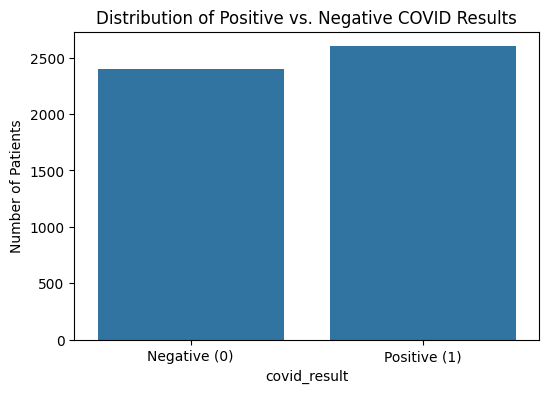

In [ ]:
# Visualization - Mirroring the wine notebook style
plt.figure(figsize=(6, 4))
sns.countplot(x='covid_result', data=df)
plt.title('Distribution of Positive vs. Negative COVID Results')
plt.xticks([0, 1], ['Negative (0)', 'Positive (1)'])
plt.ylabel('Number of Patients')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Define target and features (dropping ID as it's not a feature)
y = df.covid_result
X = df.drop(columns=['covid_result', 'patient_id'])

# First split: 80% train_temp and 20% test
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Second split: train_temp into train (60%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=1)

print(f"Train size: {len(X_train)}, Validation size: {len(X_val)}, Test size: {len(X_test)}")


Train size: 3000, Validation size: 1000, Test size: 1000


--- Feature Importance: Correlation with Target ---
dry_cough                    0.356314
loss_of_smell                0.337180
contact_with_patient         0.335066
fever                        0.327811
shortness_of_breath          0.299072
comorbidity_none             0.038167
fatigue                      0.032583
headache                     0.024200
travel_history               0.017237
gender_Male                  0.014850
loss_of_taste                0.006189
age                          0.003630
sore_throat                 -0.001571
comorbidity_Diabetes        -0.013854
chest_pain                  -0.014612
body_temperature            -0.024087
comorbidity_Heart Disease   -0.035275
oxygen_level                -0.305738
Name: covid_result, dtype: float64


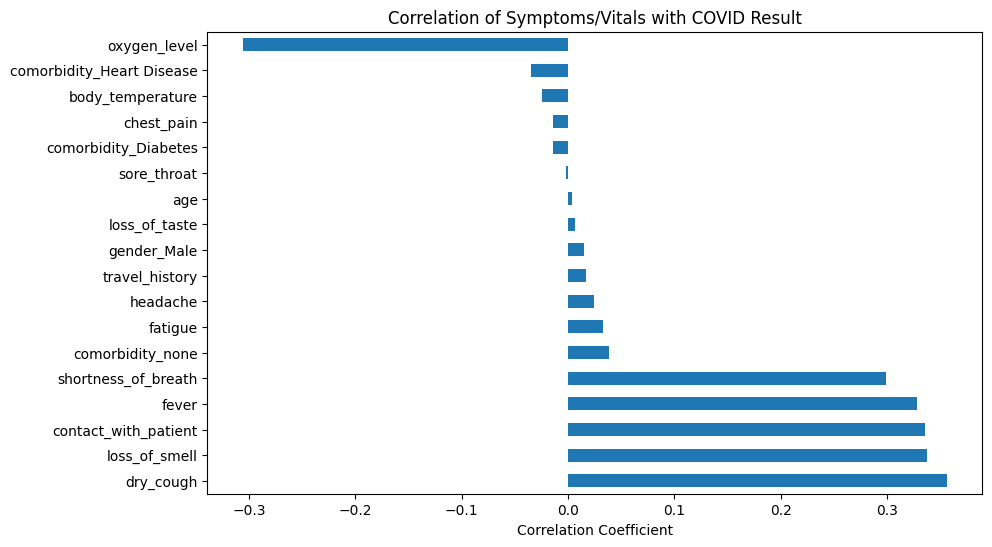

In [ ]:
# Combine training features and target for correlation analysis
df_train = X_train.copy()
df_train['covid_result'] = y_train

# Identify categorical columns for one-hot encoding
categorical_cols = df_train.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
df_train_encoded = pd.get_dummies(df_train, columns=categorical_cols, drop_first=True)

print("--- Feature Importance: Correlation with Target ---")
# Calculate correlation of all features with the 'covid_result' target
correlation_scores = df_train_encoded.corr()['covid_result'].sort_values(ascending=False)

# Display scores, excluding the target variable itself
print(correlation_scores.drop(index=['covid_result']))

# Visualization
plt.figure(figsize=(10, 6))
correlation_scores.drop(index=['covid_result']).plot(kind='barh')
plt.title('Correlation of Symptoms/Vitals with COVID Result')
plt.xlabel('Correlation Coefficient')
plt.show()

In [ ]:
from sklearn.metrics import mutual_info_score

In [ ]:
def calculate_mi(series):
    return mutual_info_score(series, df_train.covid_result)

# Apply to categorical/binary symptom columns
mi_scores = df_train.drop(columns=['covid_result', 'age', 'oxygen_level', 'body_temperature']).apply(calculate_mi)
print("\n--- Mutual Information Scores ---")
print(mi_scores.sort_values(ascending=False))


--- Mutual Information Scores ---
dry_cough               0.064908
loss_of_smell           0.059206
contact_with_patient    0.057569
fever                   0.054750
shortness_of_breath     0.045959
comorbidity             0.000927
fatigue                 0.000531
headache                0.000293
travel_history          0.000149
gender                  0.000110
chest_pain              0.000107
loss_of_taste           0.000019
sore_throat             0.000001
dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

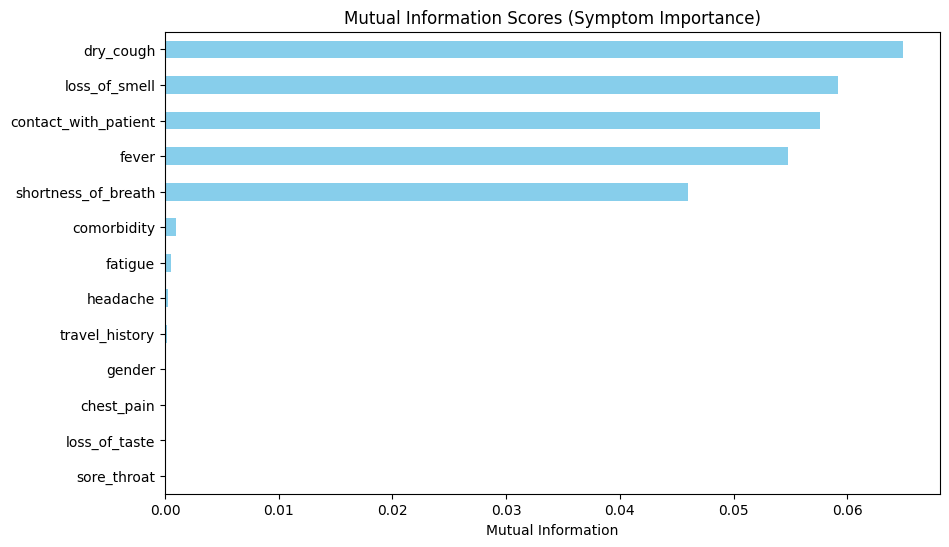

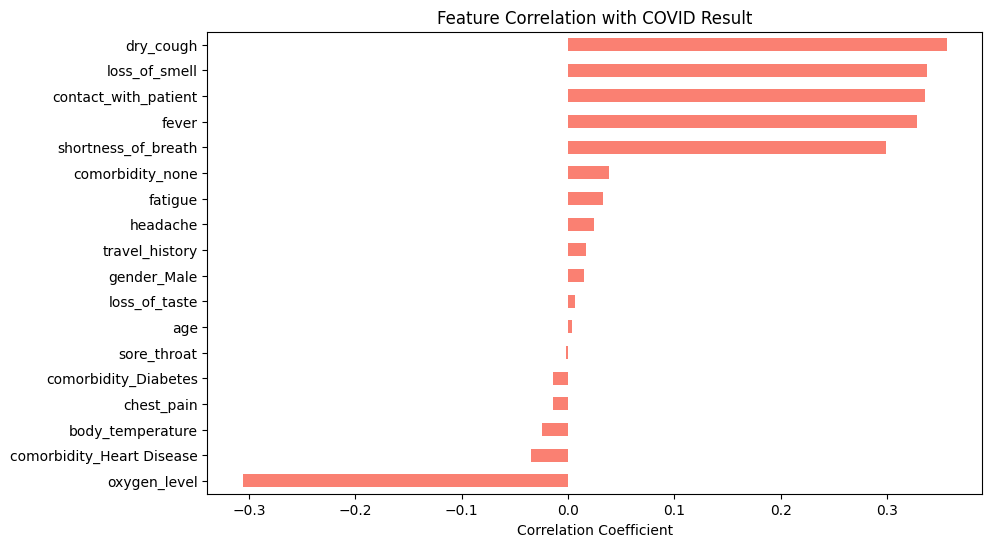

In [ ]:

# 1. Visualize Mutual Information
plt.figure(figsize=(10, 6))
mi_scores.sort_values(ascending=True).plot(kind='barh', color='skyblue')
plt.title('Mutual Information Scores (Symptom Importance)')
plt.xlabel('Mutual Information')
plt.show()

# 2. Visualize Correlation
plt.figure(figsize=(10, 6))
correlation_scores.drop(index=['covid_result']).sort_values(ascending=True).plot(kind='barh', color='salmon')
plt.title('Feature Correlation with COVID Result')
plt.xlabel('Correlation Coefficient')
plt.show()

In [ ]:
from sklearn.feature_extraction import DictVectorizer

In [ ]:
# Define feature sets
categorical = ['gender', 'comorbidity']
numerical = ['age', 'oxygen_level', 'body_temperature']
binary_symptoms = [
    'fever', 'dry_cough', 'sore_throat', 'fatigue', 'headache',
    'shortness_of_breath', 'loss_of_smell', 'loss_of_taste',
    'chest_pain', 'travel_history', 'contact_with_patient'
]

features = categorical + numerical + binary_symptoms

In [ ]:
# Convert dataframes to dictionaries
train_dicts = X_train[features].to_dict(orient='records')
val_dicts = X_val[features].to_dict(orient='records')

# Fit and transform
dv = DictVectorizer(sparse=False)
X_train_processed = dv.fit_transform(train_dicts)
X_val_processed = dv.transform(val_dicts)

print(f"Processed Data Shape: {X_train_processed.shape}")

Processed Data Shape: (3000, 20)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
# Initialize a dictionary to store scores for comparison
score_summary = {}

In [ ]:
print("--- Training Baseline Model: Logistic Regression ---")
model_lr = LogisticRegression(solver='liblinear', random_state=1)
model_lr.fit(X_train_processed, y_train)

y_val_pred = model_lr.predict_proba(X_val_processed)[:, 1]
auc_lr = roc_auc_score(y_val, y_val_pred)
print(f"Logistic Regression AUC-ROC: {auc_lr:.4f}")

# Add the best result to summary
score_summary['Logistic Regression'] = auc_lr

--- Training Baseline Model: Logistic Regression ---
Logistic Regression AUC-ROC: 0.9947


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
print("--- Tuning Random Forest Classifier ---")
depths = [3, 5, 10, 15, None]
best_auc = 0
best_depth = None

for depth in depths:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=1)
    rf.fit(X_train_processed, y_train)

    y_pred = rf.predict_proba(X_val_processed)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print(f"Depth {depth}: AUC-ROC = {auc:.4f}")

    if auc > best_auc:
        best_auc = auc
        best_depth = depth

print(f"\nBest Random Forest: Depth={best_depth}, AUC={best_auc:.4f}")

# Add the best result to summary
score_summary[f'Random Forest (Depth {best_depth})'] = best_auc

--- Tuning Random Forest Classifier ---
Depth 3: AUC-ROC = 0.9988
Depth 5: AUC-ROC = 1.0000
Depth 10: AUC-ROC = 1.0000
Depth 15: AUC-ROC = 1.0000
Depth None: AUC-ROC = 1.0000

Best Random Forest: Depth=10, AUC=1.0000


In [ ]:
import xgboost as xgb

In [ ]:
print("--- Tuning XGBoost Classifier ---")

# Pre-processing for XGBoost (requires specific DMatrix or standard format)
# Note: XGBoost is excellent for binary classification like covid_result
dtrain = xgb.DMatrix(X_train_processed, label=y_train)
dval = xgb.DMatrix(X_val_processed, label=y_val)

watchlist = [(dtrain, 'train'), (dval, 'val')]

# Tuning parameters like eta (learning rate) and max_depth 
etas = [0.3, 0.1, 0.01]
best_xgb_auc = 0

for eta in etas:
    xgb_params = {
        'eta': eta,
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'nthread': 8,
        'seed': 1,
        'verbosity': 0,
    }

    model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=False)
    y_pred = model.predict(dval)
    auc = roc_auc_score(y_val, y_pred)
    print(f"XGBoost eta={eta}: AUC = {auc:.4f}")

    if auc > best_xgb_auc:
        best_xgb_auc = auc

# Add the best result summary
score_summary['XGBoost (Tuned)'] = best_xgb_auc

--- Tuning XGBoost Classifier ---
XGBoost eta=0.3: AUC = 1.0000
XGBoost eta=0.1: AUC = 1.0000
XGBoost eta=0.01: AUC = 1.0000


In [ ]:
print("--- Ranges of Values and Descriptive Statistics ---")
# Using the transpose (.T) for better readability.
print(X_train.describe().T)

--- Ranges of Values and Descriptive Statistics ---
                       count       mean        std   min   25%   50%     75%  \
age                   3000.0  44.964333  25.619287   1.0  22.0  45.0  67.000   
fever                 3000.0   0.564667   0.495883   0.0   0.0   1.0   1.000   
dry_cough             3000.0   0.493667   0.500043   0.0   0.0   0.0   1.000   
sore_throat           3000.0   0.413333   0.492514   0.0   0.0   0.0   1.000   
fatigue               3000.0   0.592000   0.491545   0.0   0.0   1.0   1.000   
headache              3000.0   0.443333   0.496861   0.0   0.0   0.0   1.000   
shortness_of_breath   3000.0   0.328333   0.469685   0.0   0.0   0.0   1.000   
loss_of_smell         3000.0   0.300667   0.458624   0.0   0.0   0.0   1.000   
loss_of_taste         3000.0   0.288667   0.453218   0.0   0.0   0.0   1.000   
oxygen_level          3000.0  91.903000   4.336034  85.0  88.0  92.0  96.000   
body_temperature      3000.0  38.522767   1.430445  36.0  37.3  38.6

In [ ]:
print("--- Analysis of Highly Correlated Binary/Categorical Features vs. COVID Result ---")

top_binary_features = ['dry_cough', 'loss_of_smell', 'fever', 'contact_with_patient', 'shortness_of_breath']

for feature in top_binary_features:
    print(f"\nDistribution of {feature} by COVID Result:")
    # Use pd.crosstab for a clear table of counts
    display(pd.crosstab(df[feature], df['covid_result'], margins=True))


--- Analysis of Highly Correlated Binary/Categorical Features vs. COVID Result ---

Distribution of dry_cough by COVID Result:


covid_result,0,1,All
dry_cough,,,
0,1649,885,2534
1,751,1715,2466
All,2400,2600,5000



Distribution of loss_of_smell by COVID Result:


covid_result,0,1,All
loss_of_smell,,,
0,2058,1445,3503
1,342,1155,1497
All,2400,2600,5000



Distribution of fever by COVID Result:


covid_result,0,1,All
fever,,,
0,1444,719,2163
1,956,1881,2837
All,2400,2600,5000



Distribution of contact_with_patient by COVID Result:


covid_result,0,1,All
contact_with_patient,,,
0,1863,1137,3000
1,537,1463,2000
All,2400,2600,5000



Distribution of shortness_of_breath by COVID Result:


covid_result,0,1,All
shortness_of_breath,,,
0,1943,1315,3258
1,457,1285,1742
All,2400,2600,5000


--- Analysis of Highly Correlated Numerical Features vs. COVID Result ---

Descriptive Statistics of oxygen_level by COVID Result:


,count,mean,std,min,25%,50%,75%,max
covid_result,,,,,,,,
0,2400.0,93.279583,4.036071,85.0,91.0,94.0,97.0,99.0
1,2600.0,90.692308,4.161507,85.0,87.0,90.0,94.0,99.0


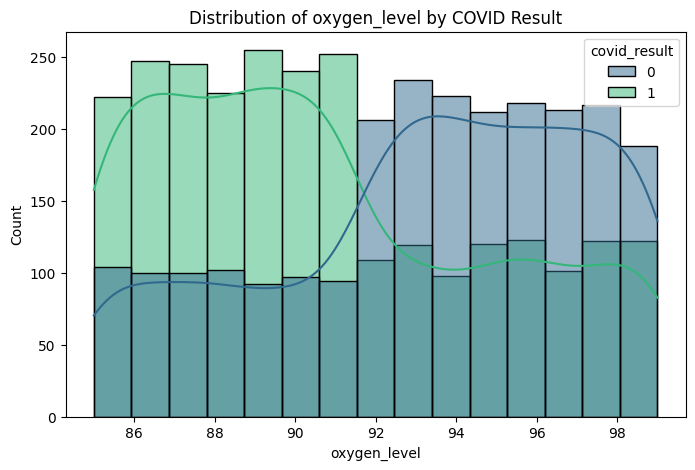


Descriptive Statistics of body_temperature by COVID Result:


,count,mean,std,min,25%,50%,75%,max
covid_result,,,,,,,,
0,2400.0,38.520250,1.436671,36.0,37.300,38.5,39.7,41.0
1,2600.0,38.482231,1.427499,36.0,37.275,38.5,39.7,41.0


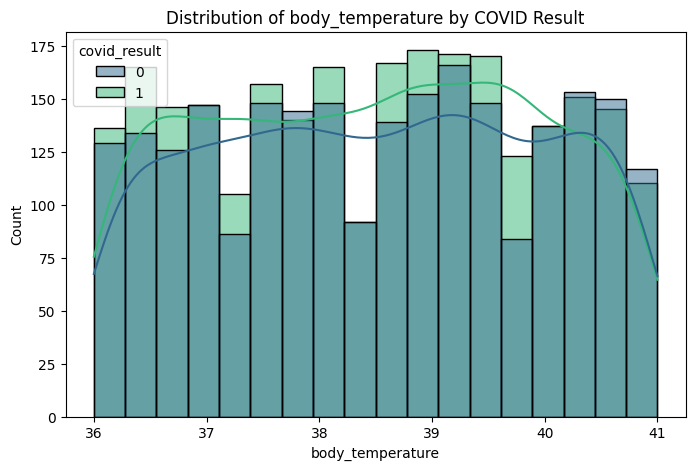


Descriptive Statistics of age by COVID Result:


,count,mean,std,min,25%,50%,75%,max
covid_result,,,,,,,,
0,2400.0,44.154167,25.506499,1.0,22.0,43.0,66.0,89.0
1,2600.0,44.589615,25.596351,1.0,22.0,45.0,66.0,89.0


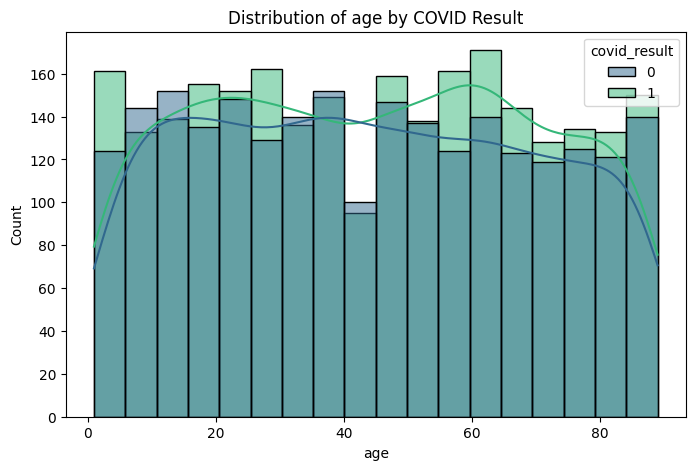

In [ ]:
print("--- Analysis of Highly Correlated Numerical Features vs. COVID Result ---")

top_numerical_features = ['oxygen_level', 'body_temperature', 'age']

for feature in top_numerical_features:
    print(f"\nDescriptive Statistics of {feature} by COVID Result:")
    # Group by covid_result and describe the feature
    display(df.groupby('covid_result')[feature].describe())

    # Visualize the distribution
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=feature, hue='covid_result', kde=True, palette='viridis')
    plt.title(f'Distribution of {feature} by COVID Result')
    plt.show()


In [ ]:
import pandas as pd

In [ ]:
summary_df = pd.DataFrame(score_summary.items(), columns=['Model', 'AUC-ROC'])
summary_df = summary_df.sort_values(by='AUC-ROC', ascending=False).reset_index(drop=True)

print("--- Final Model Selection Summary (on Validation AUC-ROC) ---")
print(summary_df)

final_model_name = summary_df.iloc[0]['Model']
print(f"\nSelected Best Model: {final_model_name}")

--- Final Model Selection Summary (on Validation AUC-ROC) ---
                      Model   AUC-ROC
0  Random Forest (Depth 10)  1.000000
1           XGBoost (Tuned)  1.000000
2       Logistic Regression  0.994687

Selected Best Model: Random Forest (Depth 10)


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
print("--- Evaluating Final Model on Test Set ---")

# Instantiate the best model found during tuning
final_model_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=1,
    n_jobs=-1
)

# Re-train on the full training data (Train + Val) for maximum data utilization
test_dicts = X_test[features].to_dict(orient='records')
X_test_processed = dv.transform(test_dicts)

final_model_rf.fit(X_train_processed, y_train)

# Predict on Test Set
y_test_pred = final_model_rf.predict_proba(X_test_processed)[:, 1]
auc_test = roc_auc_score(y_test, y_test_pred)

print(f"Final Random Forest Model AUC-ROC on Test Set: {auc_test:.4f}")

--- Evaluating Final Model on Test Set ---
Final Random Forest Model AUC-ROC on Test Set: 1.0000


In [ ]:
import pickle

# Define the output file name
output_file = 'model.bin'

# Save the DictVectorizer and the Model together
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, final_model_rf), f_out)

print(f"Model and DictVectorizer saved to {output_file}")

Model and DictVectorizer saved to model.bin
